In [2]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

# <font color=navy> 참고자료: 확률분포함수

## 1. 이산확률분포 (Discrete probability distribution)

### <font color=blue> 이산균등분포 (Discrete Uniform disribution):  $\mbox{DiscreteUnif}(a,b)$</font>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Uniform_discrete_pmf_svg.svg/650px-Uniform_discrete_pmf_svg.svg.png" width=400>


#### 기대값과 분산 
$$E(X) = \frac{a+b}2$$
$$Var(X) = \frac{(b-a+1)^2-1}{12}$$

In [2]:
np.random.seed(0)
np.random.randint(5, size=[3,4])

array([[4, 0, 3, 3],
       [3, 1, 3, 2],
       [4, 0, 0, 4]])

### <font color=blue> 이항분포 (Binomial disribution):  $Binom(n,p)$</font>
#### Example 
- X= 동전을 n번 던졌을 때 앞면의 개수 
- X= 4지선다형 20문항의 시험에 무작위로 답을 써 넣을 때 정답의 개수 

#### 확률질량함수 
$$ P(X=x) = {n \choose x} p^x (1-p)^{n-x},~~~ x=0,1,\ldots, n $$

#### 기대값과 분산 
$$E(X) = np$$
$$Var(X) = np(1-p)$$

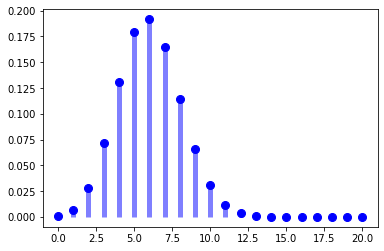

In [3]:
from scipy.stats import binom

n=20
p=0.3

# probability mass function
rv = binom(n, p)
fig, ax = plt.subplots(1, 1)
x = np.arange(0,n+1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8)
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

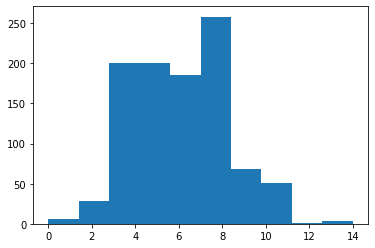

In [4]:
# random samples and histogram
np.random.seed(0)
r = binom.rvs(n, p, size=1000)
plt.hist(r)
plt.show()

In [5]:
# mean and variance
mean, var = binom.stats(n, p, moments='mv')
print('mean: %.1f, var: %.1f' %(mean,var))

mean: 6.0, var: 4.2


------
### <font color=blue> 베르누이 분포 (Bernoulli distribution): $Bernoulli(p)$

이항분포에서 $n=1$인 경우의 확률분포 
    
#### Example
- X= 동전을 한번 던졌을 때 앞면이 나오면 1, 아니면 0 
- X= 한 정부 정책에 대한 찬반의견을 물었을 때 찬성하면 1, 반대하면 0
    

------
### <font color=blue> 포아송 분포 (Poisson distribution): $Poi(\lambda)$

#### Example
- 버스 정류장에 한 시간에 도착하는 버스의 대수 
- 어느 상점에 한 시간에 도착하는 고객의 수 

#### 확률질량함수 
$$ p(x) = \frac{\lambda^x}{x!}e^{-\lambda}, ~~ x=0,1,2,...$$
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/650px-Poisson_pmf.svg.png" width=400>

#### 기대값과 분산 
$$ E(X) = \lambda, Var(X) = \lambda $$

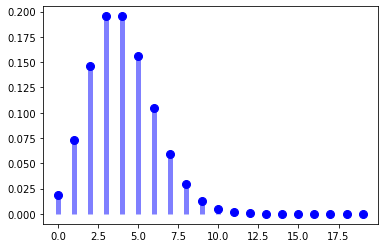

In [3]:
from scipy.stats import poisson

mu=4
x = np.arange(0,20)
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

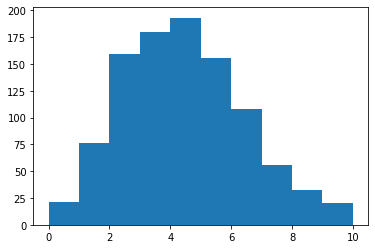

In [7]:
np.random.seed(0)
r = poisson.rvs(mu, size=1000)
plt.hist(r)
plt.show()

-----
### <font color=blue> 다항분포 (Multinomial distribution): $Multin(x;p_1, \ldots, p_k)$
    
#### 확률질량함수
$$ p(x) =  {n \choose x_1 ~x_2 ~ \cdots ~ x_k} p_1^{x_1} \cdots p_k^{x_k},~~~ x_j = 0, 1, \ldots, n; ~\sum_j  x_j = n $$

#### 기대값과 분산

$$ E(X_j) = np_j $$
$$ Var(X_j) = np_j (1-p_j)$$
$$ Cov(X_i, X_j) = -np_ip_j$$

------
## 2. 연속확률분포 (Continuous probability distribution) 

### <font color=blue> 균등분포 (Uniform distribution): $Unif(a,b)$
    
- $a$와 $b$사이에 균등하게 분포 

#### 확률밀도함수
$$ f(x) = \frac {1}{b-a}, ~~a<x<b$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png" width=400>

#### 기대값과 분산 
$$E(X) = \frac{a+b}{2}$$
$$Var(X) = \frac{(b-a)^2}{12} $$

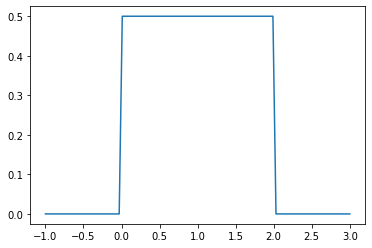

In [6]:
from scipy.stats import uniform

x = np.linspace(-1, 3, 100)
plt.plot(x, uniform.pdf(x, loc=0, scale=2))
plt.show()

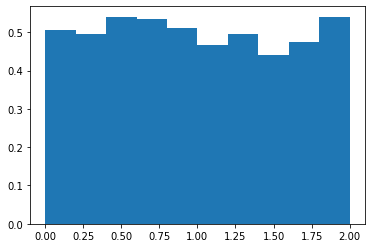

In [9]:
np.random.seed(0)
r = uniform.rvs(size=1000, loc=0, scale=2)
plt.hist(r, density=True, histtype='stepfilled')
plt.show()

------

### <font color=blue> Beta 분포: $Beta(\alpha, \beta)$

#### Example 
- 어떤 사건에 대한 성공률 
- 한 타자의 타율

#### 확률밀도함수 
$$ f(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}, ~~ 0<x<1, \alpha>0, \beta>0$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/650px-Beta_distribution_pdf.svg.png" width=400>

#### 기대값과 분산 
$$ E(X) = \frac{\alpha}{\alpha+\beta} $$
$$ Var(X)= \frac{\alpha \beta}{ (\alpha+\beta)^2 (\alpha+\beta+1)} $$

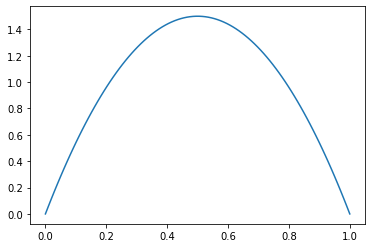

In [10]:
from scipy.stats import beta
a=2
b=2

x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b))
plt.show()

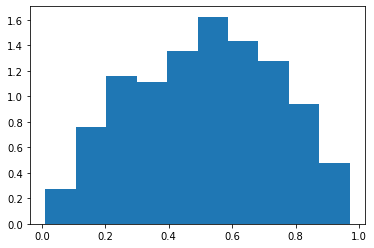

In [11]:
r = beta.rvs(a, b, size=1000)
plt.hist(r, density=True, histtype='stepfilled')
plt.show()

------
### <font color=blue> 지수분포 (Exponential distribution): $Exp(\alpha)$

#### Example
- 정류장에 버스가 올 때까지 걸리는 시간 
- 한 가게에 손님이 올 때까지 걸리는 시간 

#### 확률밀도함수 
$$f(x) = \lambda e^{-\lambda x}, ~~~ x\geq 0 $$ 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Exponential_probability_density.svg/650px-Exponential_probability_density.svg.png" width=400>

#### 기대값과 분산 
$$E(X) = \frac  1 \lambda $$
$$Var(X) = \frac 1 {\lambda^2} $$

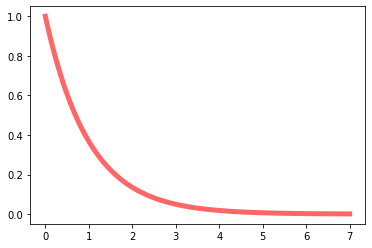

In [12]:
from scipy.stats import expon 
x = np.linspace(0, 7, 100)
plt.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')
plt.show()

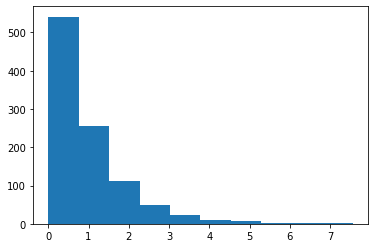

In [13]:
r = expon.rvs(size=1000)
plt.hist(r)
plt.show()

### <font color=blue> 감마분포 (Gamma distribution): $Gamma(\alpha, \beta)$
    
$$ \text{Exp}(\beta) \sim \text{Gamma}(1, \beta) $$

    

#### 확률밀도함수
$$ f(x \mid \alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x},~~x>0, \alpha>0, \beta>0  $$

$$ f(x \mid k, \theta) = \frac{1}{\Gamma(\alpha) \theta^k}x^{k-1}e^{-x/\theta},~~x>0, k>0, \theta>0  $$


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Gamma_distribution_pdf.svg/650px-Gamma_distribution_pdf.svg.png" width=400>

#### 기대값과 분산 
$$E(X) = \frac \alpha \beta = k\theta^2$$
$$Var(X) = \frac{\alpha}{\beta^2} = k\theta^2$$

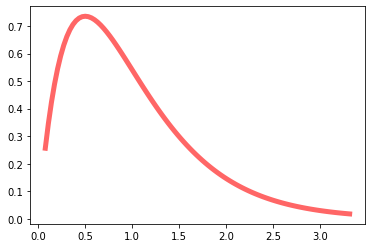

In [7]:
from scipy.stats import gamma
k = 2
theta = 1/2
x = np.linspace(gamma.ppf(0.01, a=k, scale=theta),
                gamma.ppf(0.99, a=k, scale=theta), 100)
plt.plot(x, gamma.pdf(x, a=k, scale=theta),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

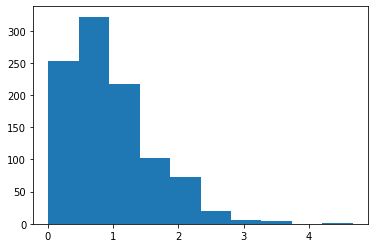

In [8]:
r = gamma.rvs(size=1000, a=k, scale=theta)
plt.hist(r)
plt.show()

------
### <font color=blue> 정규분포 (Normal distribution): $N(\mu, \sigma^2)$ or $N(\mu, 1/\tau)$

#### Example
- 중간고사 성적의 분포 
- 콜라 캔에 담겨있는 음료의 중량

#### 확률밀도함수 
$$ f(x) = \frac{1} {\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) , ~~ -\infty<x<\infty$$
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/440px-Normal_Distribution_PDF.svg.png" width=400>

#### 기대값과 분산 
$$ E(X) = \mu, Var(X)=\sigma^2$$

In [2]:
from scipy.stats import norm

norm.cdf(1.96, loc=0, scale=1) #loc = 평균, scale = 표준편차

0.9750021048517795

In [3]:
norm.ppf(0.975)

1.959963984540054

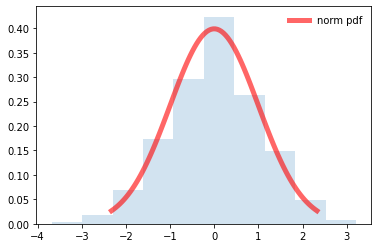

In [14]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

pm코드

- Pymc3 continuous distributions
https://docs.pymc.io/api/distributions/continuous.html
- Pymc3 discrete distributions
https://docs.pymc.io/api/distributions/discrete.html?highlight=discrete#module-pymc3.distributions.discrete

------
### <font color=blue> Wishart 분포: $X\sim W_p(V,n)$
Positive definite matrix에 대한 분포로 multivariat normal distribution $N(\mathbb \mu, \Sigma)$의 공분산 행렬 $\Sigma$에 대한 사전확률분포로 자주 사용된다.
 
- X: $p \times p$ 양정치행렬(positive definite matrix)
    
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/25e25a7445953db39cb9c07381ec19b759ef0d74">
where $n>p-1, V>0$ and 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c87a4141e6bf175182149619821a13111d354c57" width=300>
    
#### 기대값과 분산 
$$ E(X) = nV$$
$$ Var(X_{ij}) = n(v_{ij}^2 + v_{ii}v_{jj}) $$

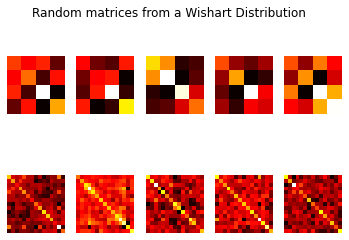

In [13]:
from scipy.stats import wishart

n = 4
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    if i >= 5:
        n = 15
    plt.imshow(wishart.rvs(n+1, np.eye(n)), interpolation="none", 
                cmap = "hot")
    ax.axis("off")
    
plt.suptitle("Random matrices from a Wishart Distribution");


----
### <font color=blue> Dirichlet 분포: $X\sim Dirichlet(\alpha_1, \ldots, \alpha_k)$

 

#### 확률밀도함수
$$ f(x) = \frac{\Gamma(\alpha_1 + \cdots+ \alpha_k)}{\Gamma(\alpha_1) \cdots \Gamma(\alpha_k) } x_1^{\alpha_1-1} \cdots x_k^{\alpha_k-1},~~ x_1, \ldots, x_k \geq 0; \sum_j x_j =1$$

#### 기대값과 분산 
$$E(X_j) = \frac{\alpha_j}{\alpha_0} $$
$$ Var(X_j) = \frac{\alpha_j (\alpha_0-\alpha_j)}{\alpha_0^2 (\alpha_0 +1)}$$
$$ Cov(X_i, X_j) = - \frac{\alpha_i \alpha_j }{\alpha_0^2 (\alpha_0+1)}$$

----
### <font color=blue> Noncentral T-분포: $X\sim t(\alpha_1, \ldots, \alpha_k)$

#### 확률밀도함수 
$$ f(x|\mu,\lambda,\nu) =
    \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})}
    \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}}
    \left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\frac{\nu+1}{2}}$$     
    
- $\mu$: location 
- $\sigma$: standard deviation 
- $\lambda$: precision  
- $\nu$: degrees of freedom

<img src="https://docs.pymc.io/_images/continuous-8.png">

----
### <font color=blue> Inverse-gamma distribution: Inv-Gamma$(\alpha,\beta)$
    
#### 확률밀도함수 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/673aeced30124fc4c292bb7ae9ee9454add858e7">
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Inv_gamma_pdf.svg/650px-Inv_gamma_pdf.svg.png">

#### 기대값과 분산 
$$E(X) = \frac{\beta}{\alpha-1}, ~~\alpha>1$$
$$Var(X) = \frac{\beta^2}{(\alpha-1)^2 (\alpha-2)},~~ \alpha>2 $$

----
### <font color=blue> Scaled Inverse-$\chi^2$ distribution: Inv-$\chi^2(\nu, \tau^2)$
    
    
Inv-$Gamma \left(\frac \nu 2, \frac{\nu \tau^2}{2}\right)$와 동일
#### 확률밀도함수 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e1bf27f69f750f896de47bdcd485b9ecba90b361">
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Scaled_inverse_chi_squared.svg/500px-Scaled_inverse_chi_squared.svg.png">

#### 기대값과 분산 
$$E(X) = \frac{\beta}{\alpha-1}, ~~\alpha>1$$
$$Var(X) = \frac{\beta^2}{(\alpha-1)^2 (\alpha-2)},~~ \alpha>2 $$